# 대구 & 경북 확진자의 감염 케이스 확인 
---  

### 개요  
- '03 노트북'에서 얻은 인사이트 '각 지역 감염 케이스별'의 심화 과정
- 당시 뉴스에서 얻은 정보와 데이터에서 찾은 인사이트로 대구와 경북 지역을 심화 리서치 지역으로 선정
- 두 지역에서 가장 높은 감염률을 보이는 케이스를 찾음

### 목차  
1. 데이터 로드
2. 데이터 가공
3. 케이스별 대구지역의 감염자
4. 케이스별 경북지역의 감염자

###  시각화  

- 대구&경북 지역 감염자들의 상위 10위 감염 케이스를 보여주는 파이 그래프

### 인사이트 도출

- 대구&경북 지역에서 이상치로 보여질 정도의 영향력을 갖고 있었던 감염 케이스가 '신천지'라는것을 확임

### 개선사항

- 판다스에서 파이그래프를 그리는게 깔끔하지 않은데, 다른 방법을 찾아봐야 겠음.


---
## 1. 데이터 로드

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint as pp

In [7]:
#data 갖고오기
df_Case = pd.read_csv('/home/seong/workspace/covid/Data/Case.csv')

---
## 2. 데이터 가공
- 케이스별 확진자 수
- 어떤 CASE가 가장 큰 영향을 끼쳤는지 확인

In [8]:
df_case_top5 = df_Case.sort_values(by='confirmed', ascending=False).groupby('infection_case').head(5)
df_case_top5.head(5)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667
56,1200009,Daegu,-,False,contact with patient,917,-,-
57,1200010,Daegu,-,False,etc,747,-,-
145,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566,-,-
109,2000020,Gyeonggi-do,-,False,overseas inflow,305,-,-


---
## 3. 케이스별 대구지역의 감염자(06월 30일 기준)

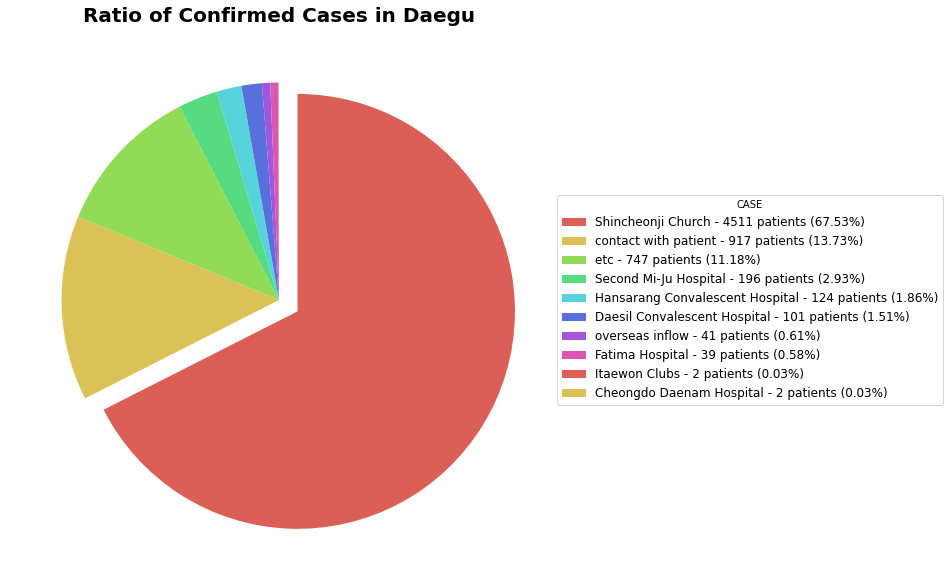

In [9]:
#대구 케이스별 확진자수(내림차순 정렬)
case_DG_group = df_Case[df_Case.province == 'Daegu'].groupby('infection_case')['confirmed'].sum().sort_values(ascending=False)

labels= list(case_DG_group.index)
data = case_DG_group.values

#확진 케이스: case_gb_group.index

frame , grid = plt.subplots(figsize= (20, 10))

# 전체 중 해당 값이 차지하는 비율 (100.0 * (해당 데이터 / 전체 누적확진자))
percent = 100.*(data/data.sum()) 

# 내포 리스트 사용 : x, y, porcent를 한 행으로 만들어서 뽑아 범례 속 내용 후 리스트에 반환
labels =  ['{0} - {1} patients ({2:1.2f}%)'.format(i, k, j) for i,k, j in zip(labels, data, percent)] 

grid.pie(case_DG_group, radius = 1, startangle=90, counterclock = False , colors = sns.color_palette("hls", 8), explode = (0.1,0, 0,0,0,0,0,0,0,0) )
grid.legend(labels, loc = 'center left' , fontsize = 12, bbox_to_anchor=(1, 0.5), title = 'CASE')

grid.set_title('Ratio of Confirmed Cases in Daegu', weight='bold', size=20)

plt.tight_layout

plt.show()

# plt.savefig('Ratio of Confirmed Cases in Daegu' , bbox_inches='tight')

---
## 4. 케이스별 경북지역의 감염자(06월 30일 기준)

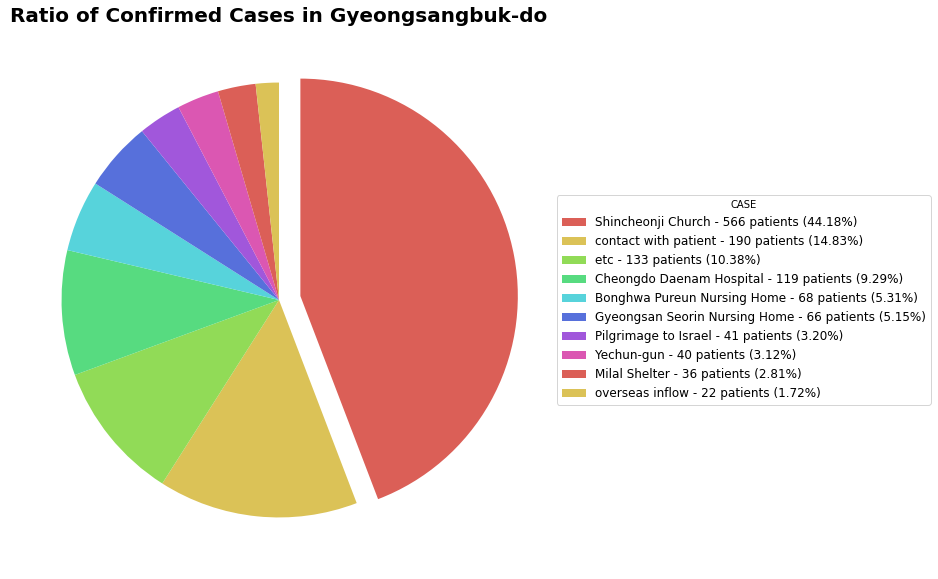

In [10]:
#경북 확진자별 파이그래프

case_GB_group = df_Case[df_Case.province == 'Gyeongsangbuk-do'].groupby('infection_case')['confirmed'].sum().sort_values(ascending=False).head(10)

labels= list(case_GB_group.index)
data = case_GB_group.values

# 전체 중 해당 값이 차지하는 비율 ( 소숫점으로 나오기 떄문에 100을 곱함 ==> 100.0 * (해당 데이터 / 전체 누적확진자) )
porcent = 100.*(data/data.sum()) 

# 내포 리스트 사용 : x, y, porcent를 한 행으로 만들어서 뽑아 범례 속 내용 후 리스트에 반환
labels =  ['{0} - {1} patients ({2:1.2f}%)'.format(i, k, j) for i,k, j in zip(labels, data, porcent)] 

frame , grid = plt.subplots(figsize= (20, 10))

grid.pie(case_GB_group, radius = 1, startangle=90, counterclock = False , colors = sns.color_palette("hls", 8), explode = (0.1,0,0,0,0,0,0,0,0,0) )

grid.legend(labels, loc = 'center left' , fontsize = 12, bbox_to_anchor=(1, 0.5), title = 'CASE')

grid.set_title('Ratio of Confirmed Cases in Gyeongsangbuk-do', weight='bold', size=20)

plt.tight_layout
# plt.savefig('Ratio of Confirmed Cases in Gyeongsangbuk-do' , bbox_inches='tight')
plt.show()